## Domanda Teorica

Descrivere con proprie parole (not CHAT-GPT oriented) il concetto di time series forecasting e cosa lo differenzia dai problemi ri regressione standard, fornendo esempi ed applicazioni/limiti.

Le time series forecasting viene utilizzato per fare previsioni future di una serie di dati organizzati in ordine cronologico.
Si tratta di stimare i valori futuri di una variabile dipendente dalla serie storica della stessa variabile.
Viene utilizzata questa tecnica in ambito finanziario, economico, metereologico, agricolo, ecc ecc.
Le differenze principali con le regressioni sono principalmentei quattro.

Dipendenza temporale: I valori sono sempre influenzati da quelli precedenti a se stessi.
Pattern: Le time series presentano spesso dei pattern ciclici stagionali, tipo l'aumento delle vendite di gelati nel periodo estivo
Autocorrelazione: I dati si correlano a se stessi nello scorrere del tempo, sia nel passato che nel futuro.
Overfitting: Essendo tutti i dati correlati tra di loro oltre ad utilizzare tutto il DF per fare il Train del modello, è facilissimo cadere in overfitting, è necessario utilizzare tecniche adeguate di Accuratezza per validare i modelli.

## Fake news Detection

In [86]:
#!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/Fake.csv
#!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/True.csv
path_fake = 'https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/Fake.csv'
path_true = 'https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/True.csv'

In [87]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [88]:
df_fake = pd.read_csv(path_fake)
df_true = pd.read_csv(path_true)
df_fake["class"] = 0 #fake
df_true["class"] = 1 #real

df_merge = pd.concat([df_fake, df_true], axis =0 )
df = df_merge.drop(["title", "subject","date"], axis = 1)
df = df.sample(frac = 1).reset_index(drop=True)
df

,text,class
0,"Bill Clinton visited Bluffton, SC to rally peo...",0
1,Funny what happens when liberals aren t able t...,0
2,WASHINGTON (Reuters) - Democrats pushing for g...,1
3,Republicans have officially sunk so low this e...,0
4,As a Democrat won a Senate seat in deep-red Al...,0
...,...,...
44893,(Reuters) - Five mayors in northern California...,1
44894,Nancy Pelosi had another strange moment during...,0
44895,They laughed at us when we said @realDonaldTru...,0
44896,"If you look closely, you might find a few fami...",0


In [90]:
# STEP1 DEFINIRE ED APPLICARE LA REGEX
#df = pd.read_csv(path)

patterns = {
            r'\d+': '',             # remove digits (numeri)
            r'[^\w\s]': ' ',         # remove punteggiatura e simboli ...,'@!£$%
            r'\b\w{1,2}\b':'',      # remove all token less than2 characters
            r'(http|www)[^\s]+':'', # remove website
            r'\s+': ' '             # sostituisce tutti i multipli spazi con uno spazio
            }

def clean_column(df, column, patterns):
    for pattern, replacement in patterns.items():
        df[column] = df[column].str.replace(pattern, replacement)
        df[column] = df[column].str.lower() # applica il lower
    return df

# Solo in preview....
clean_column(df, 'text', patterns)



,text,class
0,bill clinton visited bluffton rally people vot...,0
1,funny what happens when liberals aren able bul...,0
2,washington reuters democrats pushing for gun c...,1
3,republicans have officially sunk low this elec...,0
4,democrat won senate seat deep red alabama soc...,0
...,...,...
44893,reuters five mayors northern california thurs...,1
44894,nancy pelosi had another strange moment during...,0
44895,they laughed when said realdonaldtrump would w...,0
44896,you look closely you might find few familiar ...,0


In [91]:
# REGEX fissata
df = clean_column(df, 'text', patterns)
df

,text,class
0,bill clinton visited bluffton rally people vot...,0
1,funny what happens when liberals aren able bul...,0
2,washington reuters democrats pushing for gun c...,1
3,republicans have officially sunk low this elec...,0
4,democrat won senate seat deep red alabama soc...,0
...,...,...
44893,reuters five mayors northern california thurs...,1
44894,nancy pelosi had another strange moment during...,0
44895,they laughed when said realdonaldtrump would w...,0
44896,you look closely you might find few familiar ...,0


In [92]:
df['class'].value_counts()

0    23481
1    21417
Name: class, dtype: int64

In [95]:
df['text'].head(10)

0    bill clinton visited bluffton rally people vot...
1    funny what happens when liberals aren able bul...
2    washington reuters democrats pushing for gun c...
3    republicans have officially sunk low this elec...
4     democrat won senate seat deep red alabama soc...
5    sao paulo reuters cesar mata pires the owner a...
6    washington reuters the chairman the senate int...
7    when los angeles photographer alex stone and h...
8     united nations employee was busted for robbin...
9    rachel maddow has way cutting the point with v...
Name: text, dtype: object

In [96]:
df['text'][0]

'bill clinton visited bluffton rally people vote for hillary but met with former marine drill sgt who spoke out against hillary lies surrounding benghazi this probably the first time anyone has ever had chance confront bill clinton about benghazi clearly couldn handle the confrontation have say love these brave americans for standing pretty awesome '

In [97]:
df['label'] = df['class'].replace({1: 'true', 0: 'fake'})
df = df.drop('class', axis=1)

In [98]:
df

,text,label
0,bill clinton visited bluffton rally people vot...,fake
1,funny what happens when liberals aren able bul...,fake
2,washington reuters democrats pushing for gun c...,true
3,republicans have officially sunk low this elec...,fake
4,democrat won senate seat deep red alabama soc...,fake
...,...,...
44893,reuters five mayors northern california thurs...,true
44894,nancy pelosi had another strange moment during...,fake
44895,they laughed when said realdonaldtrump would w...,fake
44896,you look closely you might find few familiar ...,fake


In [99]:
#Creazione di nuvole
text_true = list(map(str, df[df['label']=='true']['text']))
text_fake = list(map(str, df[df['label']=='fake']['text']))

text_true = ''.join(text_true)
text_fake = ''.join(text_fake)

(-0.5, 799.5, 399.5, -0.5)

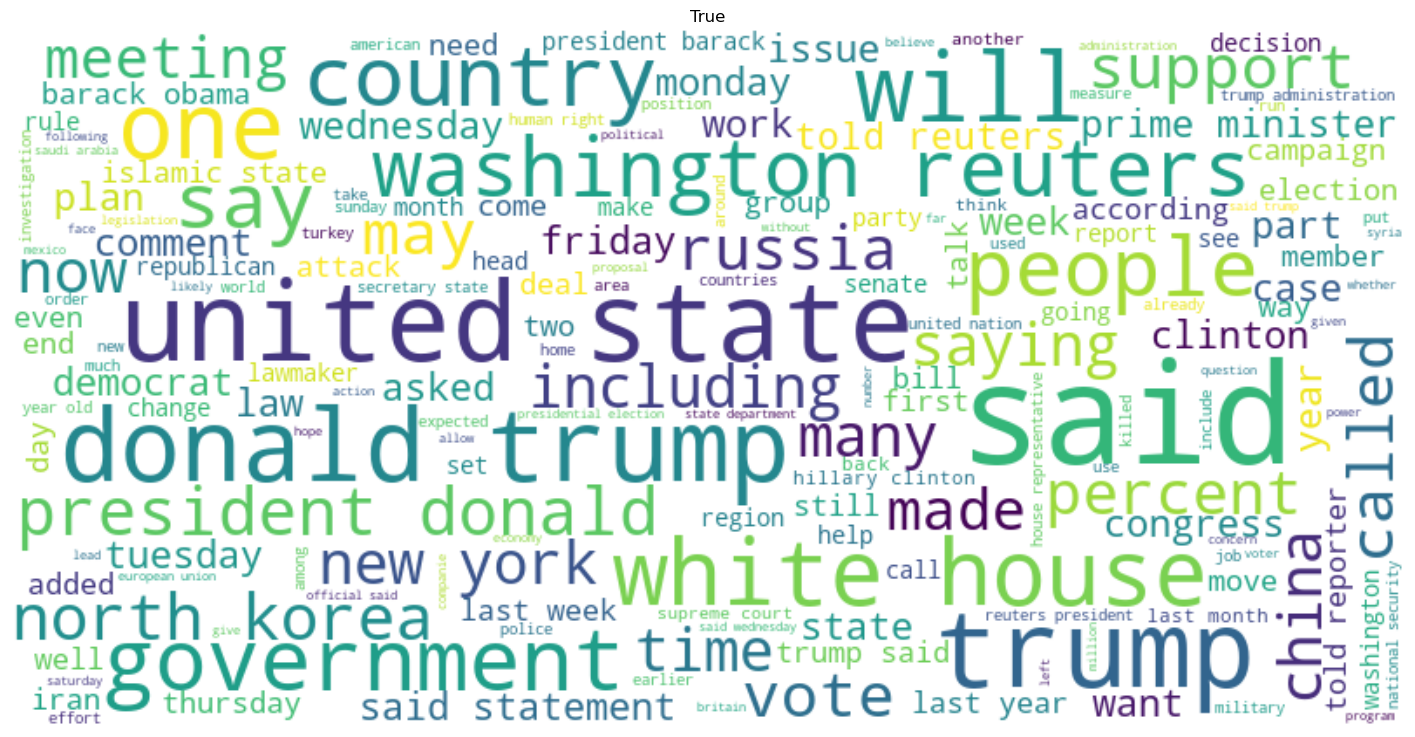

In [100]:
#EDA con WORDCLOUD true
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color = 'white', width = 800, height = 400,
                      max_words = 180, contour_width = 3,
                      max_font_size = 80, contour_color = 'yellow',
                      stopwords = STOPWORDS, random_state = 667)

wordcloud.generate(text_true)

plt.figure(figsize=(18,10))
plt.title('True')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")

(-0.5, 799.5, 399.5, -0.5)

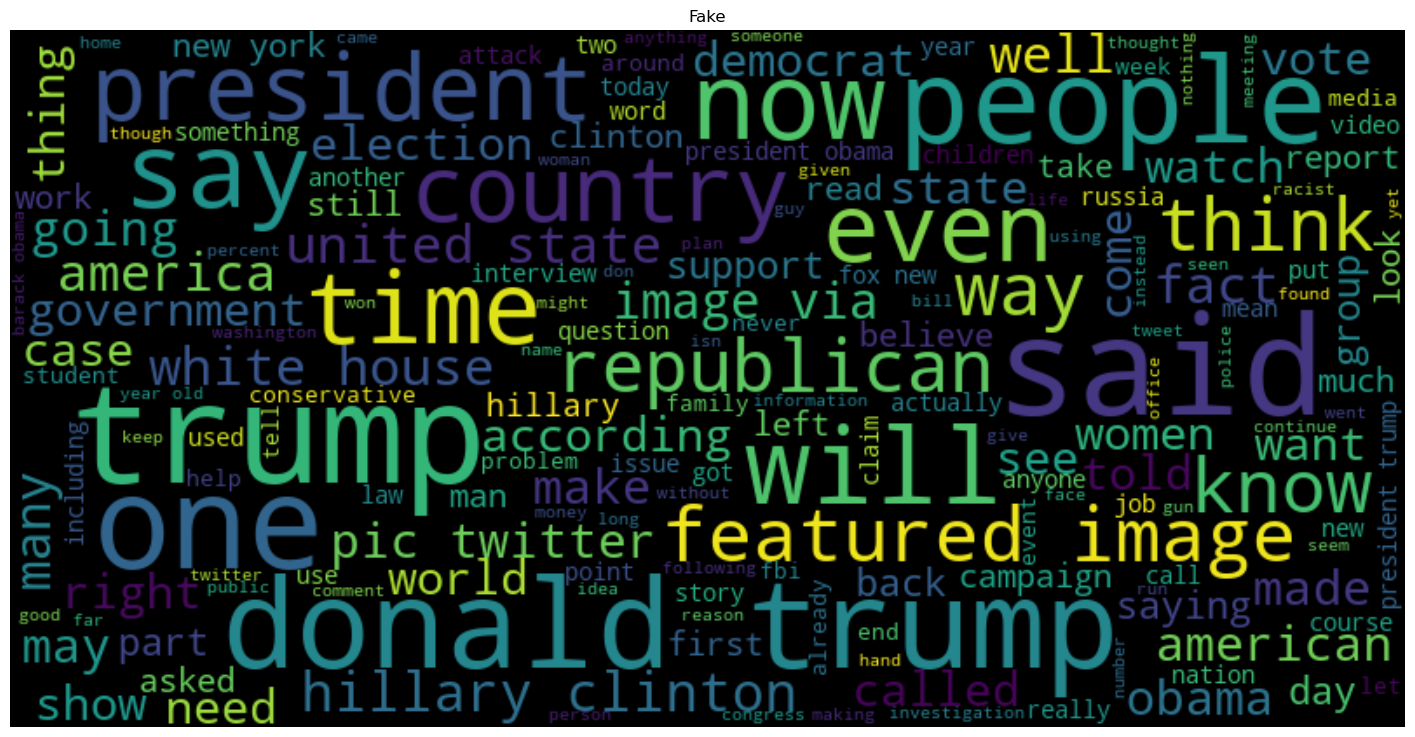

In [101]:
#EDA con WORDCLOUD fake
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wordcloud = WordCloud(background_color = 'black', width = 800, height = 400,
                      max_words = 180, contour_width = 3,
                      max_font_size = 80, contour_color = 'steelblue',
                      stopwords = STOPWORDS, random_state = 667)

wordcloud.generate(text_fake)

plt.figure(figsize=(18,10))
plt.title('Fake')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")

In [102]:
df

,text,label
0,bill clinton visited bluffton rally people vot...,fake
1,funny what happens when liberals aren able bul...,fake
2,washington reuters democrats pushing for gun c...,true
3,republicans have officially sunk low this elec...,fake
4,democrat won senate seat deep red alabama soc...,fake
...,...,...
44893,reuters five mayors northern california thurs...,true
44894,nancy pelosi had another strange moment during...,fake
44895,they laughed when said realdonaldtrump would w...,fake
44896,you look closely you might find few familiar ...,fake


In [52]:
df.isnull().sum()

text     0
label    0
dtype: int64

In [103]:
X = df['text']
y = df['label']

print(X.shape)

(44898,)


In [104]:
#Vettorizzazione
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7)
#vectorizer = CountVectorizer(stop_words='english')
X_vect = vectorizer.fit_transform(X).toarray()
X_vect

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [105]:
#TF-IDF, cerca rarita
from sklearn.feature_extraction.text import TfidfTransformer

tfidfconverter = TfidfTransformer()
X_tfidf = tfidfconverter.fit_transform(X_vect).toarray()
X_tfidf

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.06320338, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [106]:
#Split Training and Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y,
                                                    test_size=0.3, 
                                                    random_state=667
                                                    )



Faccio varie prove di modelli...

In [107]:
#Modellazione
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=1000, random_state=667,max_depth=5)
classifier.fit(X_train, y_train) 

# accuracy score on the test data
y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_pred, y_test)
test_data_accuracy

0.9878247958426132

In [108]:
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB(alpha=0.1)
classifier.fit(X_train, y_train) 

# accuracy score on the test data
y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_pred, y_test)
test_data_accuracy

0.9305864884929473

Text(95.72222222222221, 0.5, 'Actual')

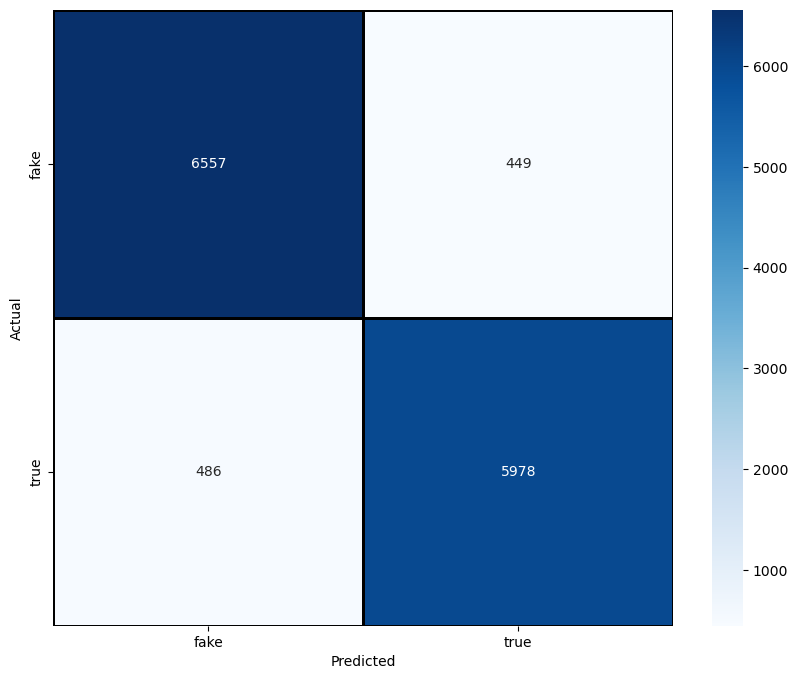

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,8))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = classifier.classes_, 
            yticklabels = classifier.classes_)

plt.xlabel("Predicted")
plt.ylabel("Actual")

In [111]:
from sklearn.linear_model import SGDClassifier

classifier = SGDClassifier(alpha=0.1)
classifier.fit(X_train, y_train) 

# accuracy score on the test data
y_pred = classifier.predict(X_test)
test_data_accuracy = accuracy_score(y_pred, y_test)
test_data_accuracy

0.5201187824795842

Text(95.72222222222221, 0.5, 'Actual')

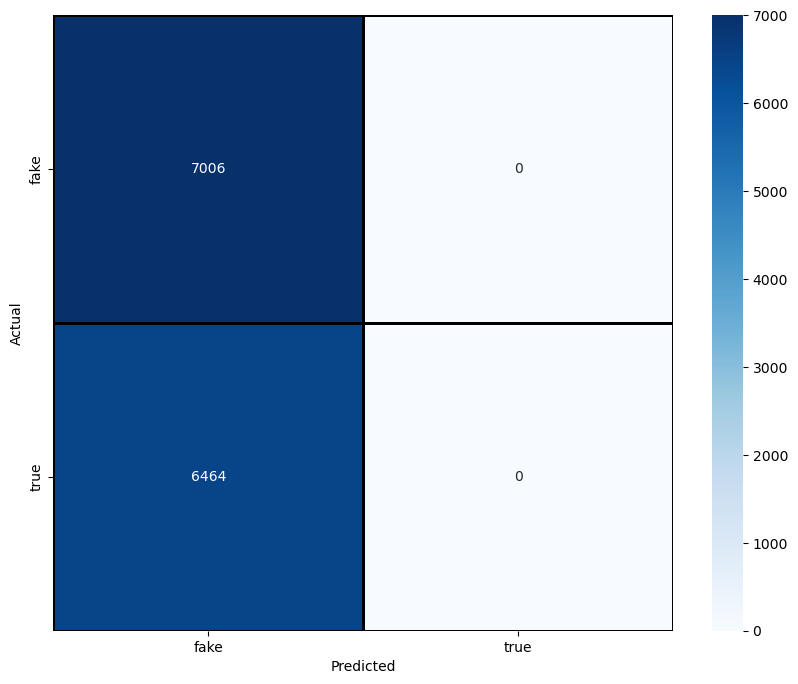

In [112]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,8))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = classifier.classes_, 
            yticklabels = classifier.classes_)

plt.xlabel("Predicted")
plt.ylabel("Actual")

In [113]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))#, target_names=labels))

              precision    recall  f1-score   support

        fake       0.52      1.00      0.68      7006
        true       0.00      0.00      0.00      6464

    accuracy                           0.52     13470
   macro avg       0.26      0.50      0.34     13470
weighted avg       0.27      0.52      0.36     13470



Text(95.72222222222221, 0.5, 'Actual')

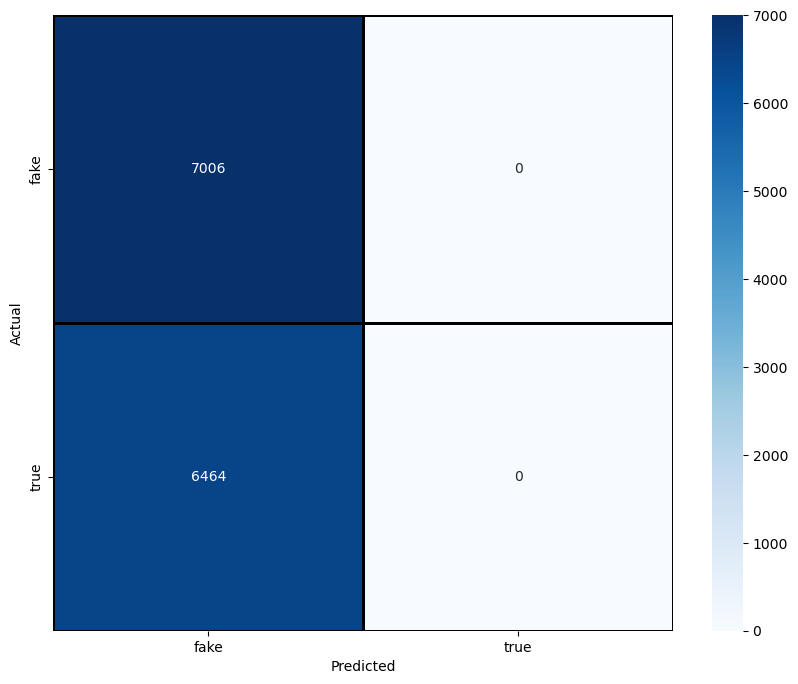

In [114]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,8))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = classifier.classes_, 
            yticklabels = classifier.classes_)

plt.xlabel("Predicted")
plt.ylabel("Actual")

PIPELINE

In [ ]:
RandomForestClassifier

In [115]:
#Pipeline Finale
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3, 
                                                    random_state=667
                                                    )


from sklearn.pipeline import Pipeline

bow = CountVectorizer(max_features=1500, min_df=5, max_df=0.7)
tfidf = TfidfTransformer()
clf = MultinomialNB(alpha=0.1)

pipe = Pipeline([
                ('bow',bow),
                ('tfidf',tfidf),
                ('clf',clf),
                ])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

test_data_accuracy = accuracy_score(y_test,y_pred)
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.9301410541945063


In [64]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

        fake       0.93      0.93      0.93      7130
        true       0.92      0.93      0.92      6340

    accuracy                           0.93     13470
   macro avg       0.93      0.93      0.93     13470
weighted avg       0.93      0.93      0.93     13470



Text(95.72222222222221, 0.5, 'Actual')

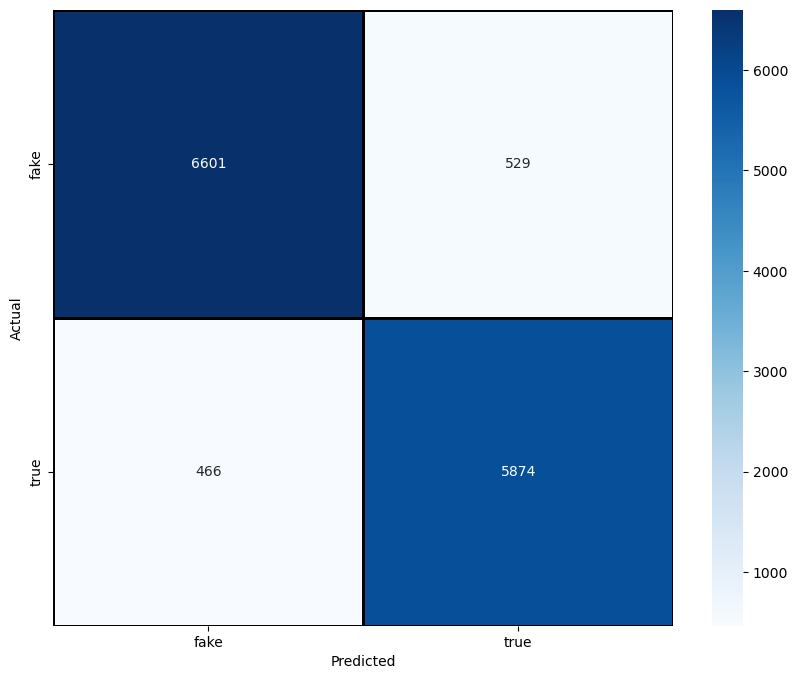

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix 

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize = (10,8))
sns.heatmap(cm,cmap= "Blues", 
            linecolor = 'black', 
            linewidth = 1, 
            annot = True, 
            fmt='', 
            xticklabels = classifier.classes_, 
            yticklabels = classifier.classes_)

plt.xlabel("Predicted")
plt.ylabel("Actual")

In [116]:
#Cross Validation
import numpy as np
from sklearn.model_selection import cross_val_score
scores = cross_val_score(pipe, X, y, scoring = 'f1_micro', cv = 8)

print(f'scores={scores}')
print(f'mean={np.mean(scores)}')
print(f'std={np.std(scores)}')

scores=[0.92891502 0.92962765 0.93121882 0.92498218 0.92248753 0.93282252
 0.92248753 0.92872416]
mean=0.9276581757245901
std=0.0036499251797867207


In [117]:
import joblib
joblib.dump(pipe,'NLPEs2.pkl')

['NLPEs2.pkl']

In [118]:
uploaded_model = joblib.load('NLPEs2.pkl')
pred = uploaded_model.predict(['senator']) #
pred[0]

'true'

In [119]:
uploaded_model = joblib.load('NLPEs2.pkl')
pred = uploaded_model.predict(['trump']) #
pred[0]

'fake'